In [420]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

title = pandas.read_csv('C:/Local/python-training/Day-9/agaricus-lepiota.names', header=None, sep=':')
specialchar_pattern = r'[@$#. \t?^&]'
num_pattern = r'[0-9]'
title[0] = title[0].str.replace(specialchar_pattern,'', regex=True)
title[0] = title[0].str.replace(num_pattern,'', regex=True)
title[0]

0                       E_or_P
1                    cap-shape
2                  cap-surface
3                    cap-color
4                      bruises
5                         odor
6              gill-attachment
7                 gill-spacing
8                    gill-size
9                   gill-color
10                 stalk-shape
11                  stalk-root
12    stalk-surface-above-ring
13    stalk-surface-below-ring
14      stalk-color-above-ring
15      stalk-color-below-ring
16                   veil-type
17                  veil-color
18                 ring-number
19                   ring-type
20           spore-print-color
21                  population
22                     habitat
Name: 0, dtype: object

In [421]:
new_row=pandas.Series(title[0])
df = pandas.read_csv('C:/Local/python-training/Day-9/agaricus-lepiota.data', header=None, sep=',')

#Push all rows 1 down and set the 0th row as new_row
df.loc[1:] = df.loc[:]
df.loc[0] = new_row

#Set the first row as column
df.columns = df.iloc[0]
df = df[1:]

#Drop all the columns with NaN title
df = df.loc[:, df.columns.notna()]
df

,E_or_P,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,E,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [422]:
df.shape

(8123, 23)

In [423]:
df.dtypes

0
E_or_P                      object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [424]:
#removing special chars form the data
specialchar_pattern = r'[@$#_. \t]'

df = df[~df.apply(lambda x:x.str.contains(specialchar_pattern).any(), axis=1)]
df

,E_or_P,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,E,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [425]:
# Mapping
df['E_or_P'].unique()



array(['e', 'p', 'E', 'P', 'Edible', 'poisonous', 'poisonOUS',
       'Poisonous'], dtype=object)

In [426]:
df['E_or_P'] = df['E_or_P'].str.upper()
df['E_or_P'] = df['E_or_P'].map({'EDIBLE' : 'E', 'POISONOUS' : 'P', 'E' : 'E', 'P' : 'P'})
df

,E_or_P,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,E,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,E,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,P,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,E,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,E,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,E,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,E,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,E,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,P,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [427]:
df.isna().sum()

0
E_or_P                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [428]:
for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype(int)
    
df

,E_or_P,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,0,5,2,9,1,0,1,0,1,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,1,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,2,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,1,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,1,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,1,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,1,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,1,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,2,0,...,1,7,7,0,2,1,0,7,4,2


In [429]:
df.drop([col for col in df.columns if df[col].var() < 0.1], axis=1, inplace=True)
df

,E_or_P,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
1,0,5,2,9,1,0,0,1,4,0,2,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,0,1,5,0,2,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,0,2,5,0,3,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,1,1,4,1,3,2,2,7,7,0,3,0,1
5,0,5,3,9,1,0,0,1,5,0,2,2,2,7,7,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,1,11,0,0,2,2,5,5,4,0,1,2
8120,0,5,2,4,0,5,0,1,11,0,0,2,2,5,5,4,0,4,2
8121,0,2,2,4,0,5,0,1,5,0,0,2,2,5,5,4,0,1,2
8122,1,3,3,4,0,8,0,2,0,1,0,2,1,7,7,0,7,4,2


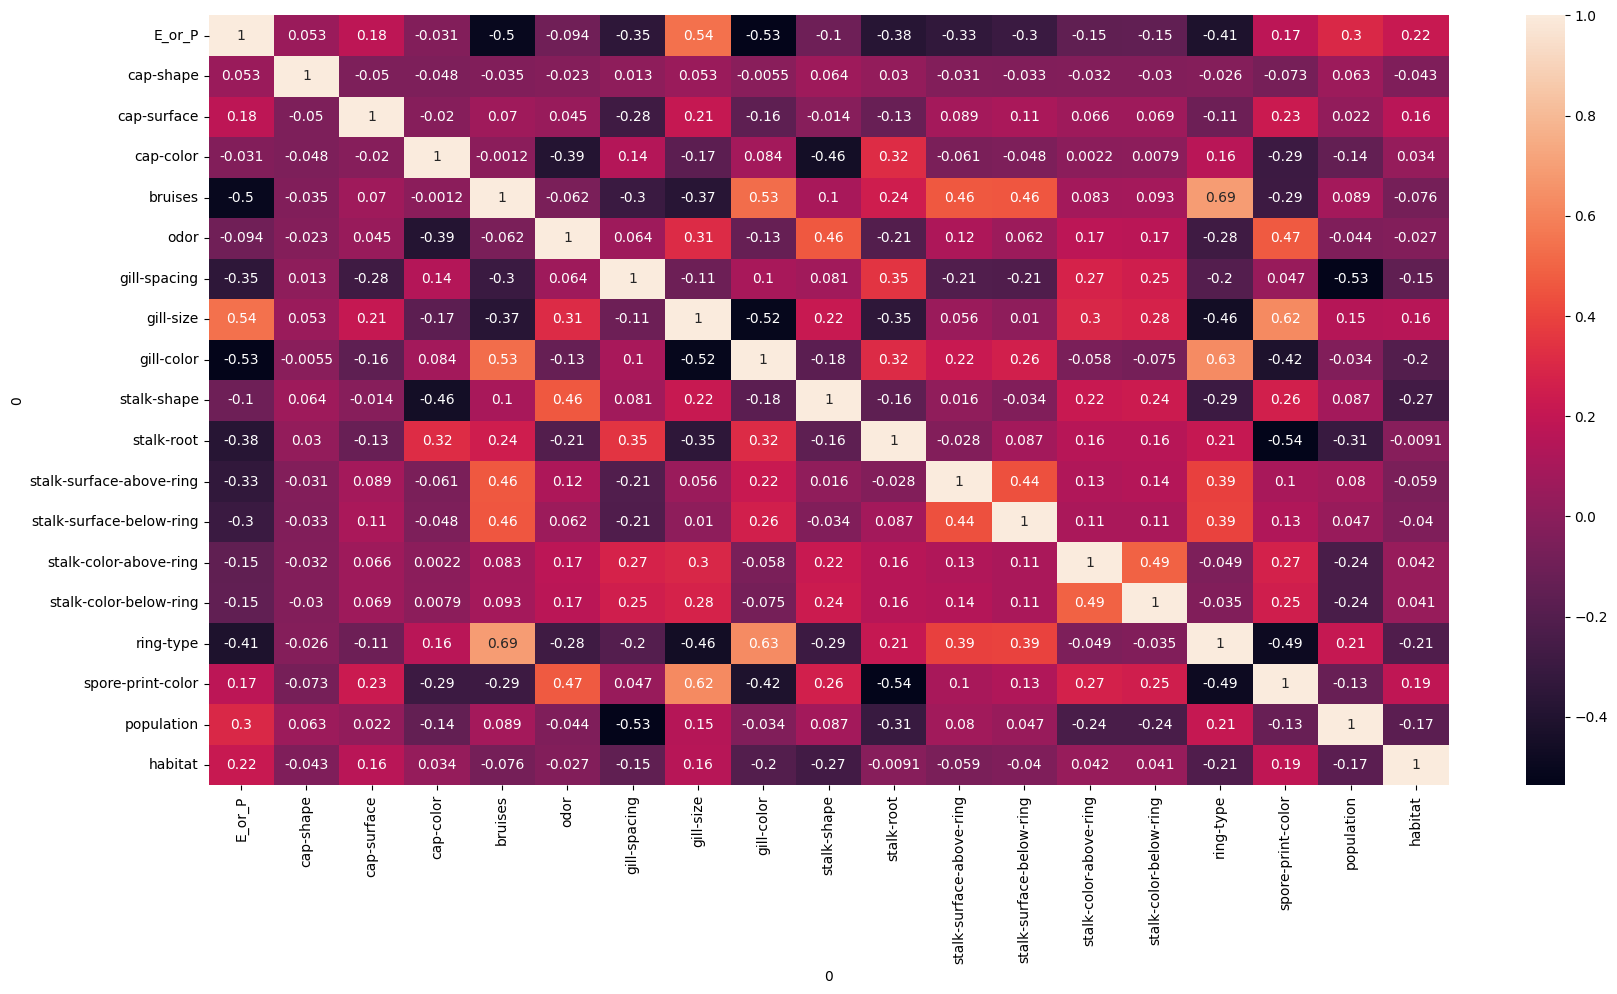

In [430]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

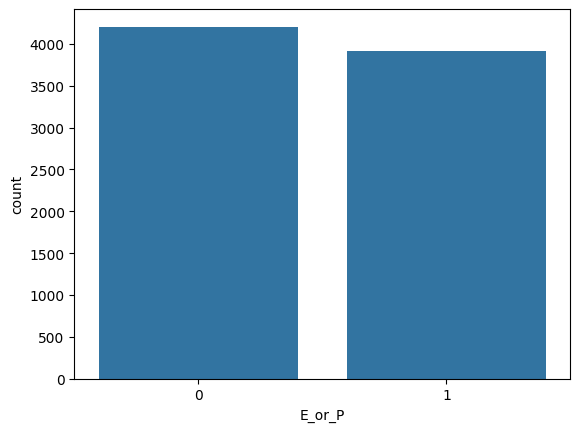

In [431]:
sns.countplot(df,x='E_or_P')
plt.show()

In [432]:
df['E_or_P'].value_counts()

E_or_P
0    4206
1    3914
Name: count, dtype: int64

In [433]:
X = df.drop('E_or_P', axis = 1)
Y = df['E_or_P']

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=3, test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5684, 18)
(2436, 18)
(5684,)
(2436,)


In [434]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
pv = lr.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))

Accuracy score is :  0.9396551724137931


In [435]:
confusion_matrix(pv, test_y)

array([[1216,   86],
       [  61, 1073]], dtype=int64)

In [436]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pv = dtc.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))

Accuracy score is :  1.0


In [437]:
confusion_matrix(pv, test_y)

array([[1277,    0],
       [   0, 1159]], dtype=int64)

In [438]:
rfc = RandomForestClassifier(n_estimators=test_x.shape[1]**2)
rfc.fit(train_x, train_y)
pv = rfc.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))

Accuracy score is :  1.0


In [439]:
confusion_matrix(pv, test_y)

array([[1277,    0],
       [   0, 1159]], dtype=int64)

In [440]:
print("feature importances are ", rfc.feature_importances_)

feature importances are  [0.0042989  0.00760288 0.01245332 0.05255107 0.16824676 0.0471085
 0.11506369 0.13343414 0.02377872 0.06245251 0.04907635 0.03185937
 0.01226408 0.0155864  0.06568938 0.09664684 0.07066913 0.03121796]


In [441]:
features = list(test_x.columns)
feature_importances_ = rfc.feature_importances_
importances = [(f, round(imp, 2)) for f, imp in zip(features, feature_importances_) ]
importances = sorted(importances, key = lambda x:x[1], reverse=True)
importances

[('odor', 0.17),
 ('gill-color', 0.13),
 ('gill-size', 0.12),
 ('spore-print-color', 0.1),
 ('ring-type', 0.07),
 ('population', 0.07),
 ('stalk-root', 0.06),
 ('bruises', 0.05),
 ('gill-spacing', 0.05),
 ('stalk-surface-above-ring', 0.05),
 ('stalk-surface-below-ring', 0.03),
 ('habitat', 0.03),
 ('stalk-shape', 0.02),
 ('stalk-color-below-ring', 0.02),
 ('cap-surface', 0.01),
 ('cap-color', 0.01),
 ('stalk-color-above-ring', 0.01),
 ('cap-shape', 0.0)]

In [442]:
list1 = []

for x,y in importances:
    if y >= 0.05:
        list1.append(x)
list1

['odor',
 'gill-color',
 'gill-size',
 'spore-print-color',
 'ring-type',
 'population',
 'stalk-root',
 'bruises',
 'gill-spacing',
 'stalk-surface-above-ring']

In [443]:
new_train_x = train_x[list1]
new_test_x = test_x[list1]

In [444]:
new_rfc = RandomForestClassifier(n_estimators=new_test_x.shape[1]**2)
new_rfc.fit(new_train_x, train_y)
pv = new_rfc.predict(new_test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))

Accuracy score is :  1.0


In [445]:
test_y.unique()

array([0, 1])

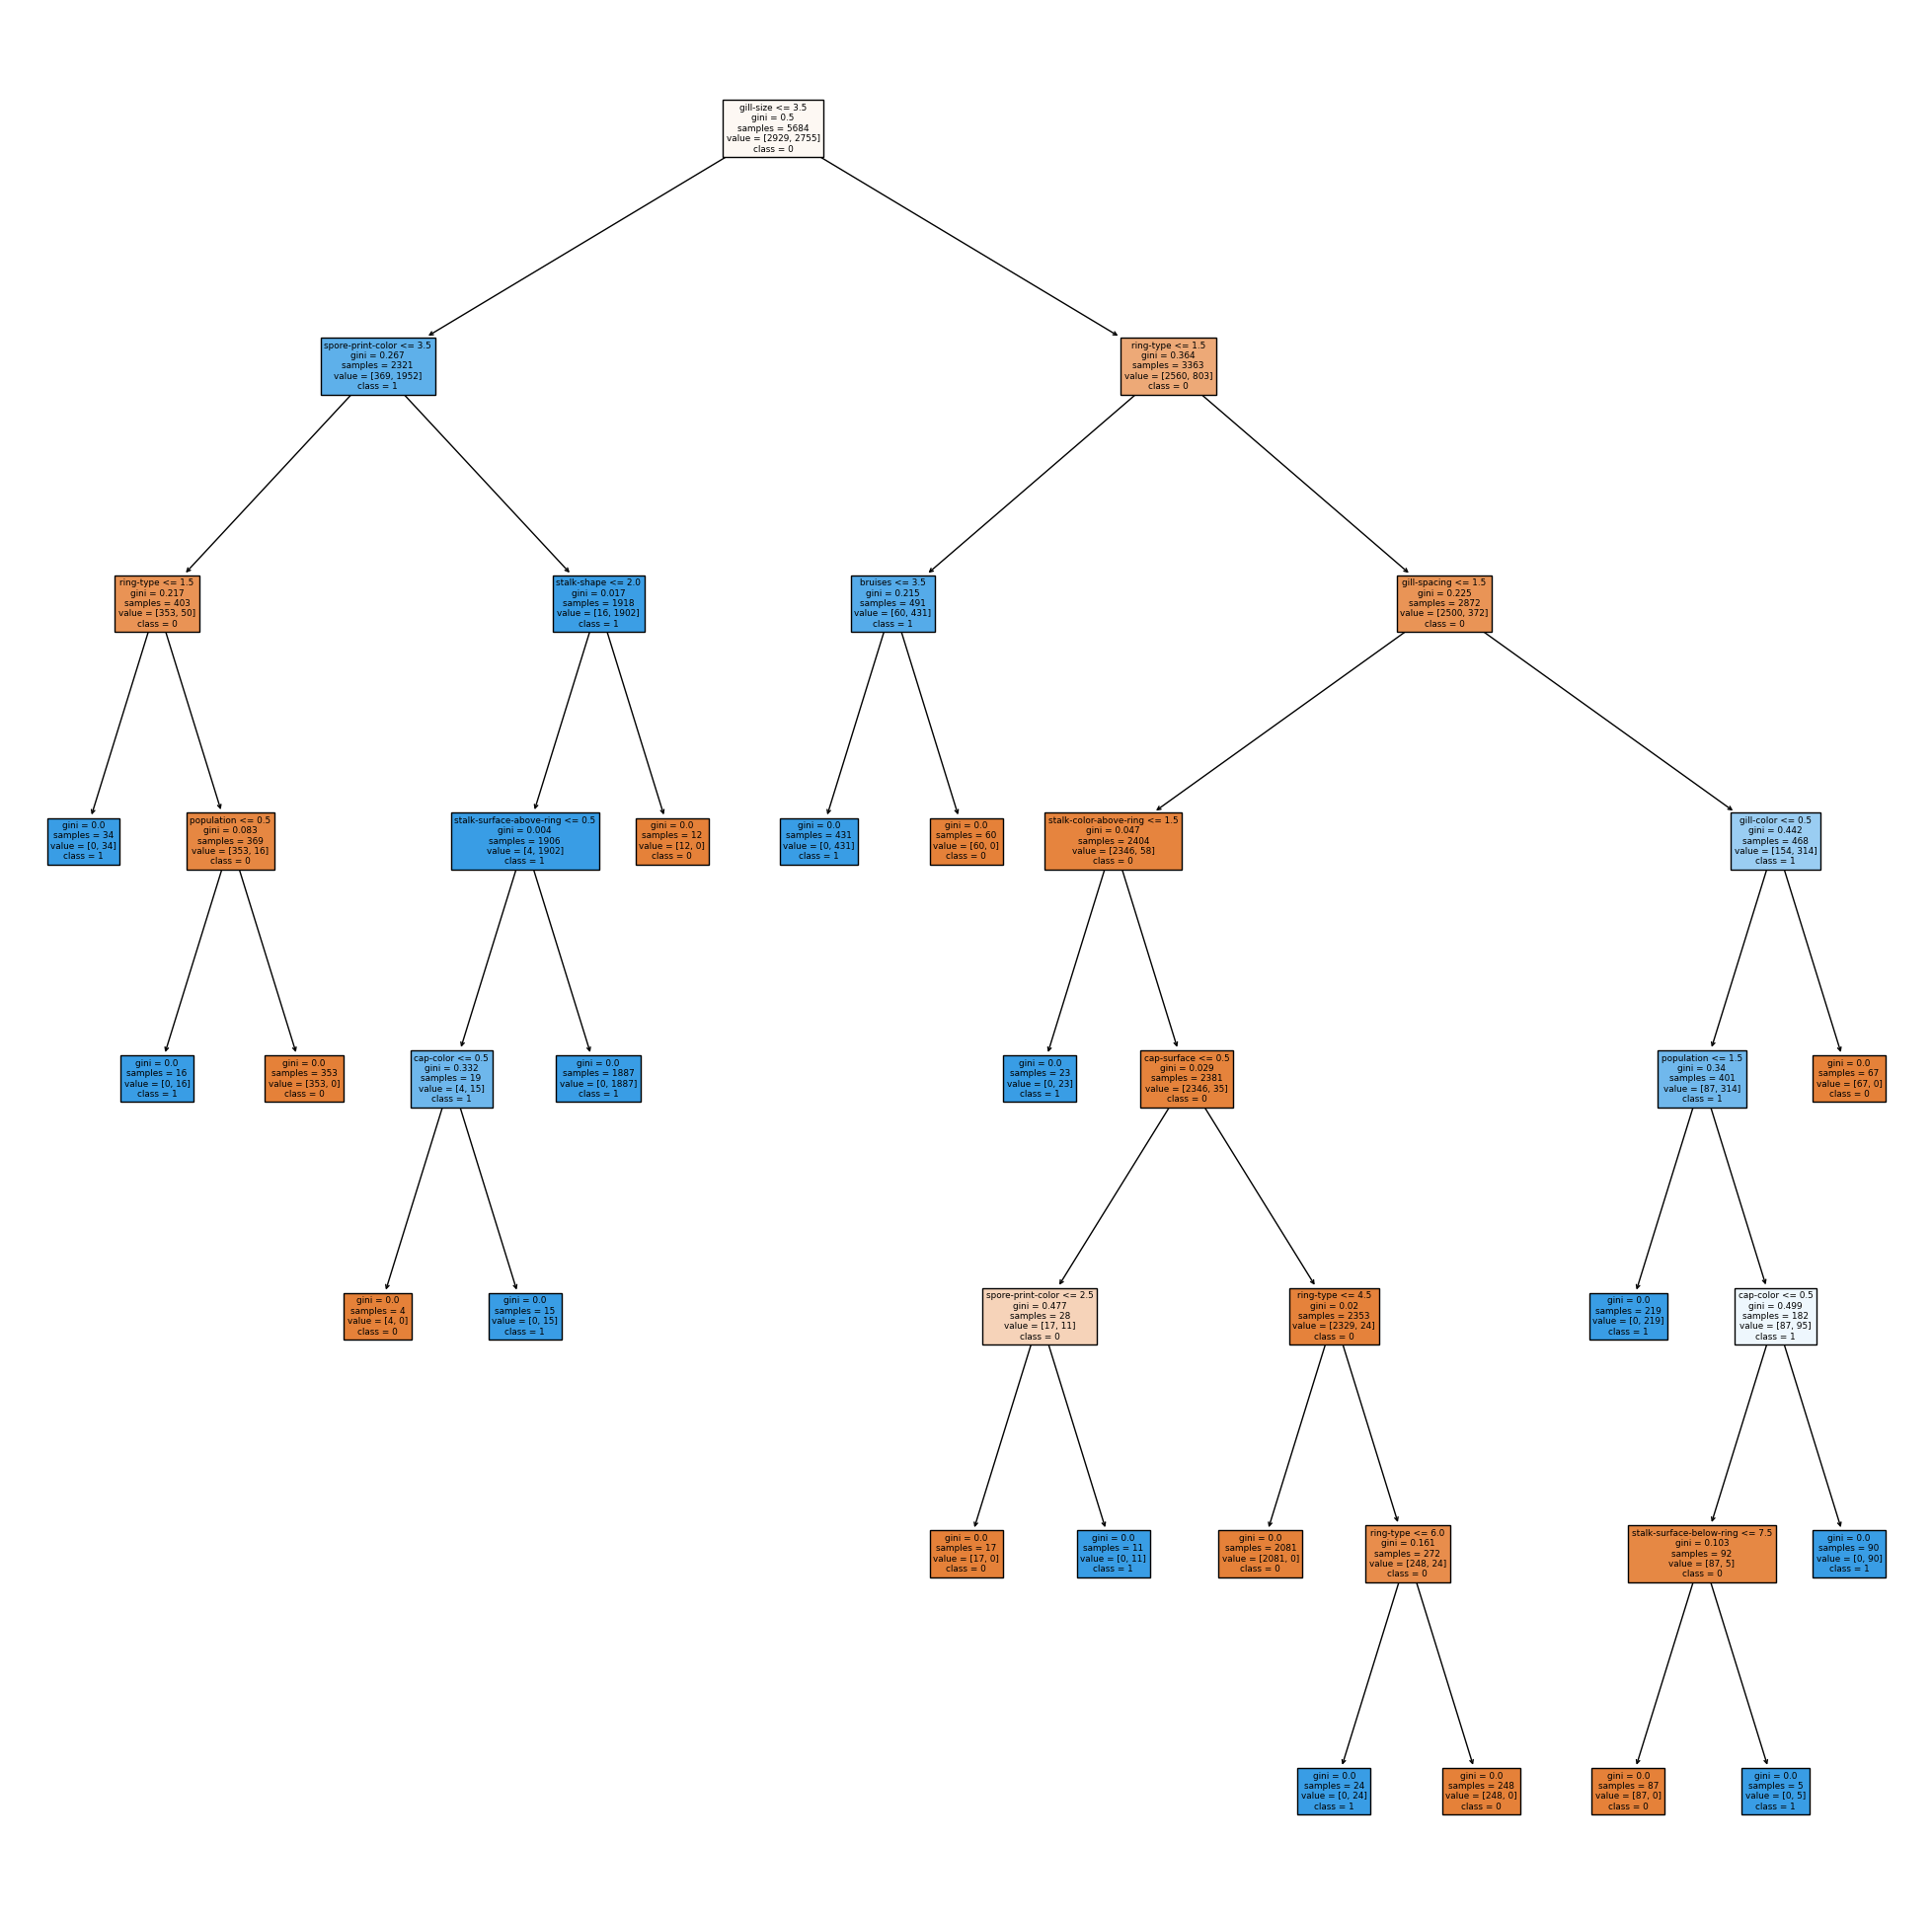

In [448]:
plt.figure(figsize=(25,25))
features = df.columns
classes = ['0','1']
tree.plot_tree(dtc,feature_names=features,class_names=classes,filled=True)
plt.show()